<a href="https://colab.research.google.com/github/yuhrtm/Tibame_GAD245/blob/main/Homework_by_42_%E4%BD%99%E5%BD%A6%E5%BF%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#第一題

假設我總共有一百層階梯, 現在我有兩種走路方式，一種是踏一層, 第二種是踏兩層

###請問：我到達第一百層的時候, 總共有幾種不同方式？

---


In [ ]:
# -------------------------
# 設定初始變數
# -------------------------
one_step = 1    # 第 1 階只有 1 種走法
two_steps = 2   # 第 2 階有 2 種走法

current_step = 3  # 從第 3 階開始

# -------------------------
# 使用 while True + break
# -------------------------
while True:
    # 若超過 100 階就停止
    if current_step > 100:
        break

    # 第 current_step 階的走法 = 前一階 + 前兩階
    current_ways = one_step + two_steps

    # 更新舊值
    one_step = two_steps
    two_steps = current_ways

    # 往上走一階
    current_step = current_step + 1

# current_ways 就是第 100 階的走法數
print("第 100 階的走法數 =", current_ways)


第 100 階的走法數 = 573147844013817084101


---

---

#第二題
我已經給妳了一個加密過後的文件(使用凱薩密碼加密), 妳要幫我試試看破解這份文件
```
#密碼文本網址
url = "https://raw.githubusercontent.com/Elwing-Chou/tibame1224/refs/heads/main/password.txt"
```

---


In [ ]:
#第二題解答

import os
import requests

# 1) 在網路找字典檔案，如果本機沒有就下載
def download_dictionary_if_needed():
    DICTIONARY_URL = "https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt"
    DICTIONARY_FILE = "words_alpha.txt"

    # 如果沒有這個檔案，就從網路下載
    if not os.path.exists(DICTIONARY_FILE):
        print("字典檔案不存在，正在下載...")
        response = requests.get(DICTIONARY_URL)

        if response.status_code == 200:
            # 下載成功就把文字寫進 words_alpha.txt 檔案
            with open(DICTIONARY_FILE, "w") as f:
                f.write(response.text)
            print("字典檔案下載完成！")
        else:
            print("無法下載字典檔案")
            # 若下載失敗，結束程式避免出錯
            exit()

# 2) 讀取字典檔案，並轉為 set (集合) 方便查詢
def load_dictionary():
    DICTIONARY_FILE = "words_alpha.txt"
    with open(DICTIONARY_FILE, "r") as f:
        all_words = f.read().split()
    # 回傳集合，之後要判斷一個單字在不在字典裡就很快
    return set(all_words)

# 3) 解密「凱薩密碼」的函式
def decrypt_caesar_cipher(text, shift):
    """
    text: 加密過的字串
    shift: 位移量 (1~25 之間)
    """
    result = ""
    for char in text:
        if char.isalpha():  # 只對英文字母做位移
            # 判斷是大寫 (A~Z) 還是小寫 (a~z)
            if char.isupper():
                base = ord('A')  # 大寫 A 的 Unicode 編碼
            else:
                base = ord('a')  # 小寫 a 的 Unicode 編碼

            # 解密公式： (原字元編碼 - base - shift) % 26 + base
            new_char_code = (ord(char) - base - shift) % 26 + base
            # 轉回字元
            result += chr(new_char_code)
        else:
            # 如果不是英文字母就原樣保留
            result += char
    return result

# 4) 計算「解密後的文本」中，有多少單字存在於字典裡
def count_dictionary_words(text, dictionary_set):
    """
    text: 解密後的文本
    dictionary_set: 字典集合
    """
    words = text.split()  # 以空格切割出每個單字
    count = 0

    for w in words:
        # 去除常見標點符號
        clean_word = w.strip(".,!?;:()[]{}\"'")

        # 忽略大小寫（都轉成小寫再檢查）
        if clean_word.lower() in dictionary_set:
            count += 1

    return count

# 5) 嘗試所有位移量 (1~25)，找出最可能的解密方式
def crack_caesar_cipher(encrypted_text, dictionary_set):
    best_shift = 0
    best_decrypted_text = ""
    max_count = 0  # 紀錄最對得上字典的單字數量

    # 依序測試 shift = 1 到 25
    for shift in range(1, 26):
        # 先解密
        decrypted_text = decrypt_caesar_cipher(encrypted_text, shift)
        # 再算算這份解密結果中，有多少英文單字
        word_count = count_dictionary_words(decrypted_text, dictionary_set)

        # 如果單字數量比目前記錄的多，就更新最佳解
        if word_count > max_count:
            max_count = word_count
            best_shift = shift
            best_decrypted_text = decrypted_text

    return best_shift, best_decrypted_text


# ------------------------
# 「主程式」從這裡開始
# ------------------------

# (A) 先檢查字典，若沒有，就下載
download_dictionary_if_needed()

# (B) 接著讀取字典，取得英文單詞集合
ENGLISH_WORDS = load_dictionary()

# (C) 從網址下載一份「已被凱薩密碼加密」的檔案
ENCRYPTED_FILE_URL = "https://raw.githubusercontent.com/Elwing-Chou/tibame1224/refs/heads/main/password.txt"
print("正在下載加密文件...")
response = requests.get(ENCRYPTED_FILE_URL)

if response.status_code == 200:
    encrypted_text = response.text
    print("加密文件下載成功。")
else:
    print("無法下載加密文件")
    exit()

# (D) 使用上面的 crack_caesar_cipher 函式，測試所有位移量
print("正在嘗試解密，請稍候...")
best_shift, best_decrypted_text = crack_caesar_cipher(encrypted_text, ENGLISH_WORDS)

# (E) 印出解密結果
print("")
print("=== 解密結果 ===")
print("最有可能的位移量:", best_shift)
print("解密後的文本內容:")
print(best_decrypted_text)


正在下載加密文件...
加密文件下載成功。
正在嘗試解密，請稍候...

=== 解密結果 ===
最有可能的位移量: 15
解密後的文本內容:
a long-expected party

when mr. bilbo baggins of bag end announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in hobbiton.

bilbo was very rich and very peculiar, and had been the wonder of the shire for sixty years, ever since his remarkable disappearance and unexpected return. the riches he had brought back from his travels had now become a local legend, and it was popularly believed, whatever the old folk might say, that the hill at bag end was full of tunnels stuffed with treasure. and if that was not enough for fame, there was also his prolonged vigour to marvel at. time wore on, but it seemed to have little effect on mr. baggins. at ninety he was much the same as at fifty. at ninety-nine they began to call him well-preserved, but unchanged would have been nearer the mark. there were some that shook their heads and 

---
---

#第三題
請畫出以下圖示

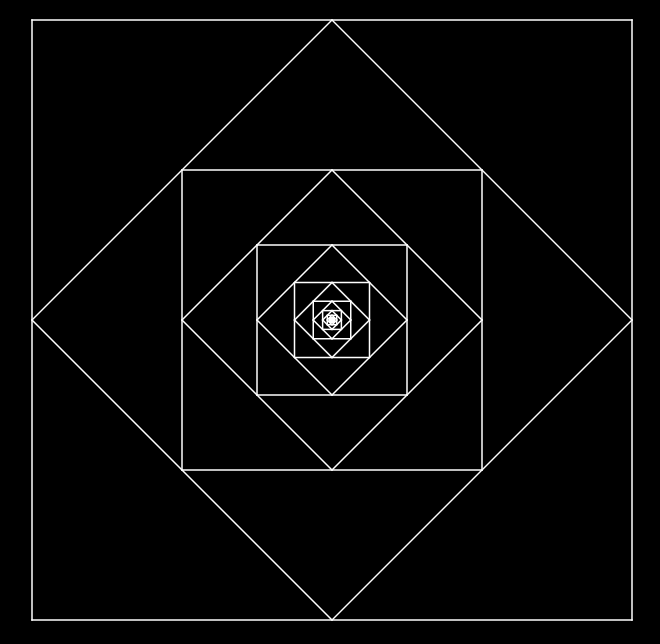

---


In [ ]:
#第三題解答


# 第一步：安裝 ColabTurtle
!pip install ColabTurtle

# 匯入所需模組
import ColabTurtle.Turtle as turtle
import math  # 用來做開平方根 (sqrt)

# ---------------------------------------------
# 函式：draw_square
# ---------------------------------------------
def draw_square(side_length, rotate_angle):
    """
    畫出一個「以螢幕中央 (0,0) 為中心」的正方形，
    並依照 rotate_angle (度數) 進行旋轉。
    """
    # 1. 把海龜移回 (0,0) 並歸向東方 (預設 0 度)
    turtle.penup()
    turtle.home()

    # 2. 旋轉指定角度
    turtle.setheading(rotate_angle)

    # 3. 為了讓方形「置中」，先向後（左）移動半邊長，再向下移動半邊長
    turtle.backward(side_length / 2)
    turtle.right(90)
    turtle.forward(side_length / 2)
    turtle.left(90)

    # 4. 開始畫正方形
    turtle.pendown()
    step_count = 0
    while step_count < 4:
        turtle.forward(side_length)
        turtle.left(90)
        step_count += 1
    turtle.penup()

# ---------------------------------------------
# 函式：main
# ---------------------------------------------
def main():
    """
    主程式：連續畫出多層方形。
    每一層畫完後，將邊長縮小為原來的 1/√2 並交替旋轉 45 度。
    """
    side = 300       # 第一層方形的邊長
    total_layers = 7 # 總層數

    current_layer = 0
    while current_layer < total_layers:
        # 如果是奇數層，就旋轉 45 度；否則轉 0 度
        if current_layer % 2 == 1:
            angle = 45
        else:
            angle = 0

        # 畫出當前這層的方形
        draw_square(side, angle)

        # 將邊長縮小為原本的 1/√2
        side = side / math.sqrt(2)

        current_layer += 1

# ---------------------------------------------
# 程式開始執行
# ---------------------------------------------
turtle.initializeTurtle()  # 建立 ColabTurtle 畫布

# 設定背景、畫筆顏色、速度及筆粗細
turtle.bgcolor("black")
turtle.color("white")
turtle.speed(13)   # 1 ~ 13 之間，數字越大速度越快
turtle.pensize(2)

# 執行主程式
main()

# ColabTurtle 不需要 turtle.done()


---
